In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
data = pd.read_csv('euro2024_players.csv')

In [3]:
data.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,623.0,2.704013e+01,4.124275e+00,16.0,24.0,27.0,30.0,41.0
Height,623.0,1.841814e+02,6.569258e+00,167.0,180.0,185.0,189.0,202.0
Caps,623.0,3.033868e+01,3.098790e+01,0.0,7.0,21.0,42.0,206.0
Goals,623.0,4.152488e+00,1.008680e+01,0.0,0.0,1.0,4.0,128.0
MarketValue,623.0,1.840903e+07,2.426195e+07,50000.0,2900000.0,9000000.0,25000000.0,180000000.0


In [6]:
data.shape

(623, 10)

In [7]:
data.isna().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [8]:
data.duplicated().sum()

0

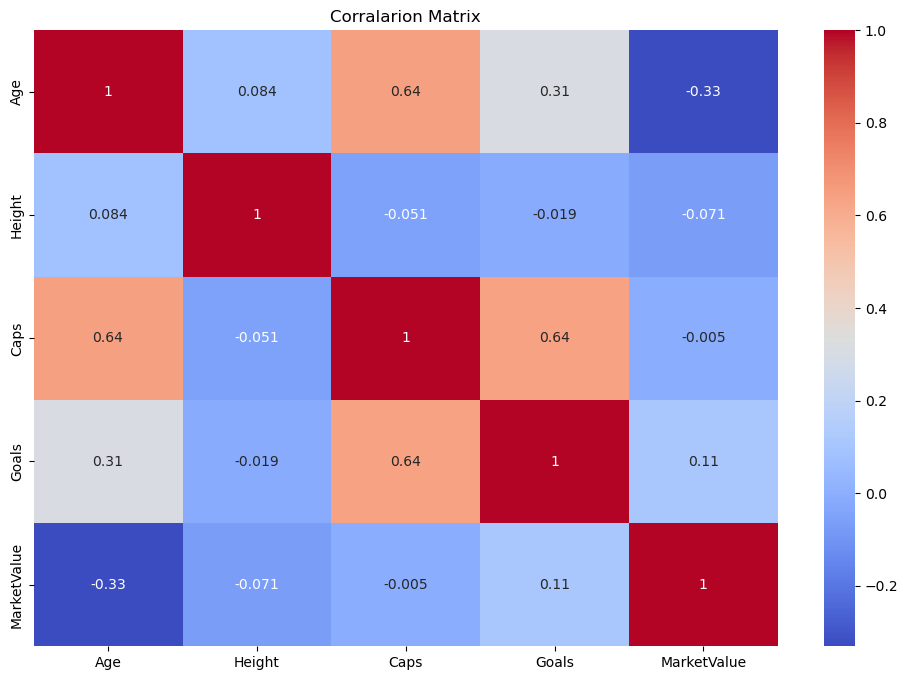

In [9]:
num_col = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,8))
sns.heatmap(data[num_col].corr(), annot=True, cmap='coolwarm')
plt.title('Corralarion Matrix')
plt.show()

In [10]:
data.columns.to_list()

['Name',
 'Position',
 'Age',
 'Club',
 'Height',
 'Foot',
 'Caps',
 'Goals',
 'MarketValue',
 'Country']

In [11]:
most_goals_index = data['Goals'].idxmax()
player_most_goals = data.loc[most_goals_index]

print("Player with the most goals:")
print(player_most_goals)

Player with the most goals:
Name           Cristiano Ronaldo
Position          Centre-Forward
Age                           39
Club                 Al-Nassr FC
Height                       188
Foot                       right
Caps                         206
Goals                        128
MarketValue             15000000
Country                 Portugal
Name: 596, dtype: object


In [12]:
least_goals_index = data['Goals'].idxmin()
player_least_goals = data.loc[least_goals_index]

print('Player with the most goals')
print(player_least_goals)

Player with the most goals
Name           Marc-André ter Stegen
Position                  Goalkeeper
Age                               32
Club                    FC Barcelona
Height                           187
Foot                           right
Caps                              40
Goals                              0
MarketValue                 28000000
Country                      Germany
Name: 0, dtype: object


In [13]:
most_cups_index = data['Caps'].idxmax()
player_most_caps = data.loc[most_cups_index, ['Name', 'Caps']]

print('Player with the most Caps')
print(player_most_caps)

Player with the most Caps
Name    Cristiano Ronaldo
Caps                  206
Name: 596, dtype: object


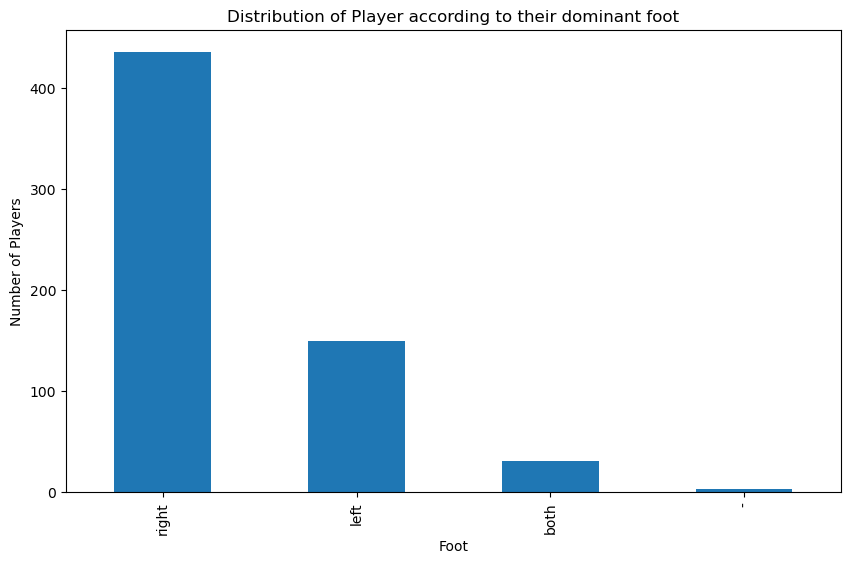

In [14]:
foot = data['Foot'].value_counts()
plt.figure(figsize=(10,6))
foot.plot(kind = 'bar')
plt.title('Distribution of Player according to their dominant foot')
plt.xlabel('Foot')
plt.ylabel('Number of Players')
plt.show()

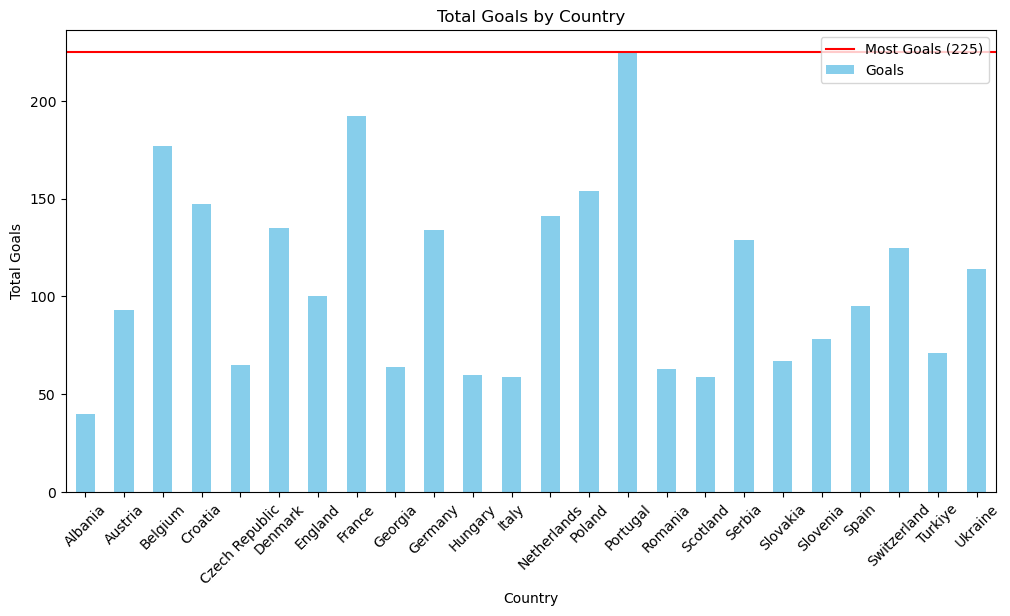

In [15]:
country_goals = data.groupby('Country')['Goals'].sum()

# Find the country with the maximum goals
max_goals_value = country_goals.max()

# Plot the goals by country
plt.figure(figsize=(12, 6))
country_goals.plot(kind='bar', color='skyblue')
plt.title('Total Goals by Country')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.axhline(max_goals_value, color='red', label=f'Most Goals ({max_goals_value})')
plt.legend()
plt.show()

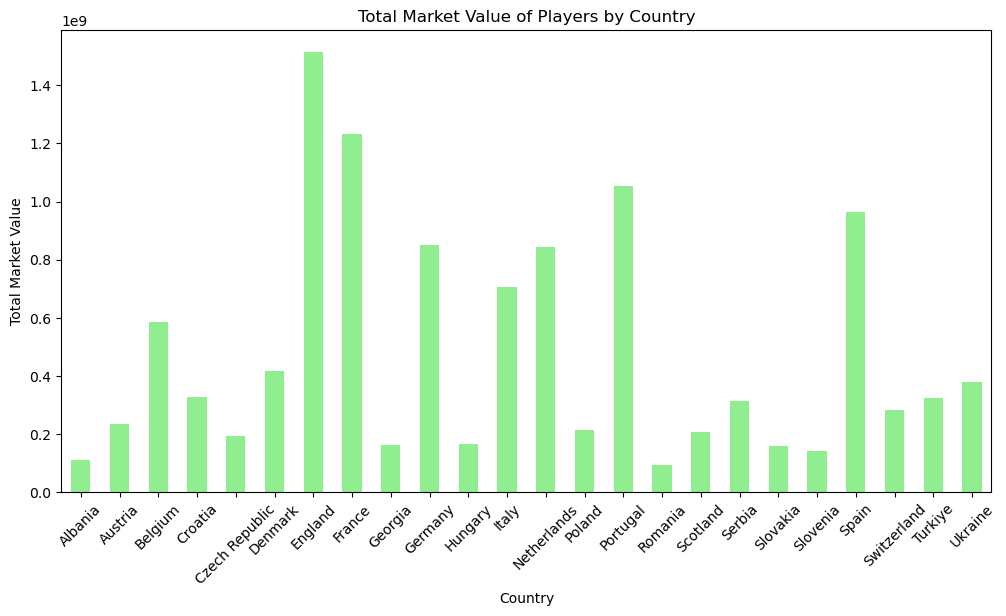

In [29]:
country_market_value = data.groupby('Country')['MarketValue'].sum()

plt.figure(figsize=(12, 6))
country_market_value.plot(kind='bar', color='lightgreen')
plt.title('Total Market Value of Players by Country')
plt.xlabel('Country')
plt.ylabel('Total Market Value')
plt.xticks(rotation=45)
plt.show()

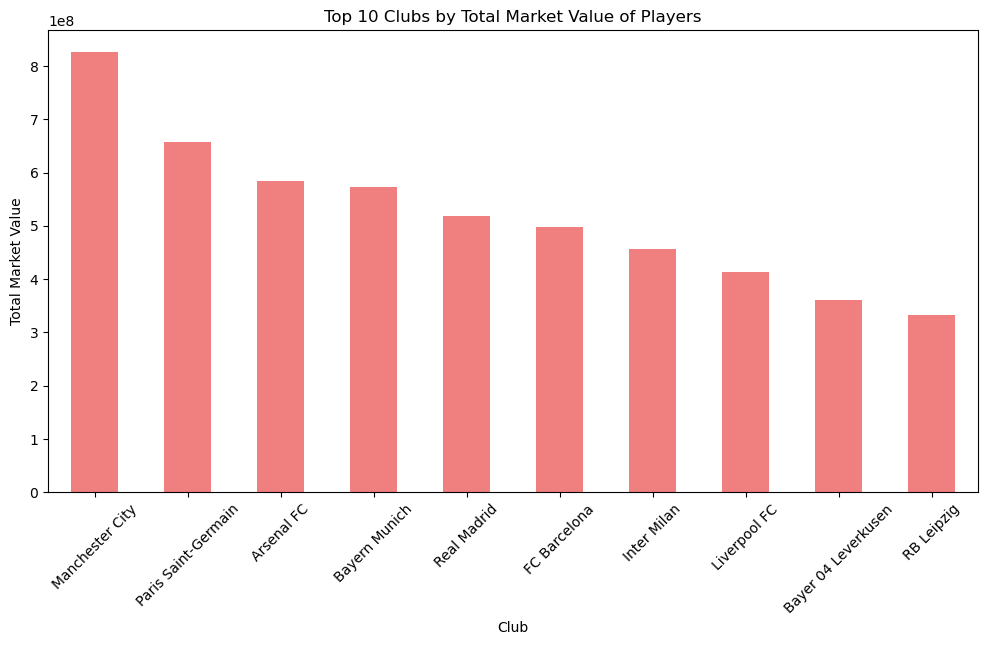

In [17]:
# Group by 'Club' and sum the 'MarketValue'
club_market_value = data.groupby('Club')['MarketValue'].sum()

# Sort the clubs by total market value in descending order and select the top 10
top_10_clubs = club_market_value.sort_values(ascending=False).head(10)

# Plot the total market value of players in the top 10 clubs
plt.figure(figsize=(12, 6))
top_10_clubs.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Clubs by Total Market Value of Players')
plt.xlabel('Club')
plt.ylabel('Total Market Value')
plt.xticks(rotation=45)
plt.show()

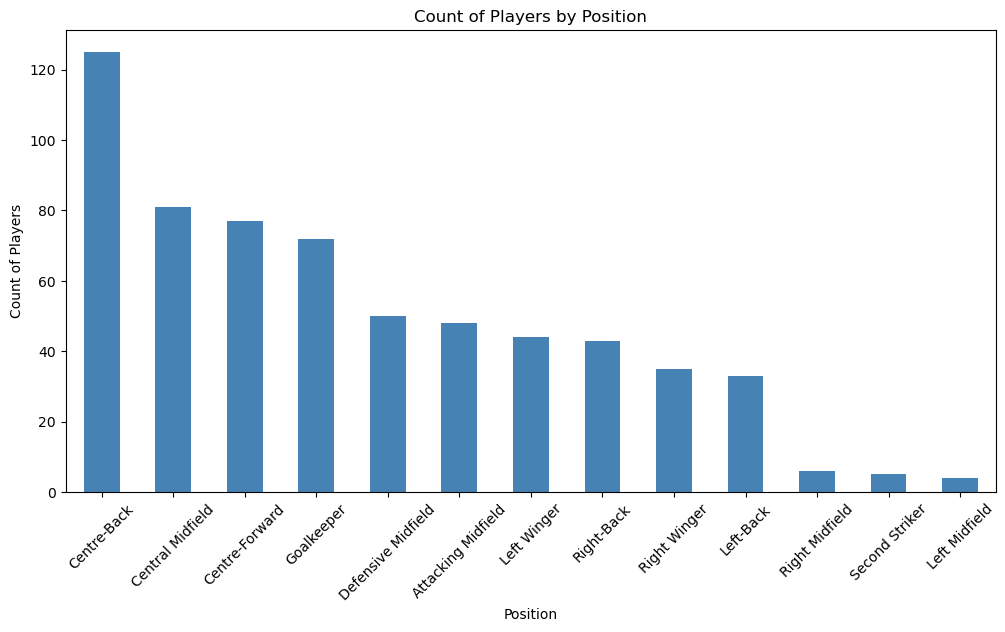

In [18]:
# Count the number of players for each position
position_counts = data['Position'].value_counts()

# Plot the count of players by position
plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar', color='steelblue')
plt.title('Count of Players by Position')
plt.xlabel('Position')
plt.ylabel('Count of Players')
plt.xticks(rotation=45)
plt.show()

In [19]:
positions = {
    'Goalkeeper': ['Goalkeeper'],
    'Defender': ['Centre-Back', 'Right-Back', 'Left-Back'],
    'Midfielder': ['Central Midfield', 'Defensive Midfield', 'Attacking Midfield', 'Right Midfield', 'Left Midfield'],
    'Attacker': ['Centre-Forward', 'Left Winger', 'Right Winger', 'Second Striker']
}

def position(position):
    for category, positions_list in positions.items():
        if position in positions_list:
            return category
    return 'Unknown'
data['Position_Category'] = data['Position'].apply(position)

<Axes: >

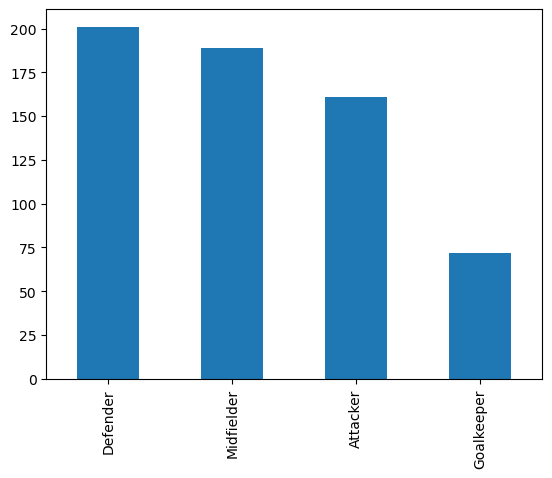

In [20]:
data['Position_Category'].value_counts().plot(kind='bar')

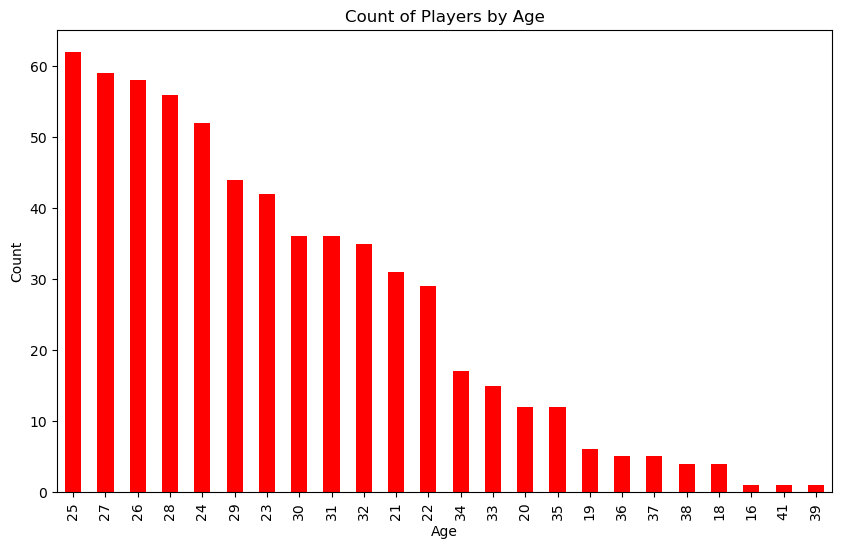

In [21]:
age_count = data['Age'].value_counts()

plt.figure(figsize=(10,6))
age_count.plot(kind='bar', color='red')
plt.title('Count of Players by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

(array([ 13.,  27.,  56.,  95., 112., 102., 143.,  43.,  27.,   5.]),
 array([167. , 170.5, 174. , 177.5, 181. , 184.5, 188. , 191.5, 195. ,
        198.5, 202. ]),
 <BarContainer object of 10 artists>)

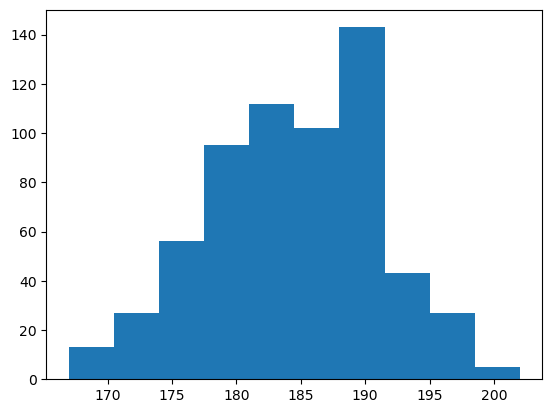

In [22]:
plt.hist(data.Height)

In [23]:
data.loc[data['Height'].idxmax()]

Name                 Vanja Milinković-Savić
Position                         Goalkeeper
Age                                      27
Club                              Torino FC
Height                                  202
Foot                                  right
Caps                                     19
Goals                                     0
MarketValue                         5000000
Country                              Serbia
Position_Category                Goalkeeper
Name: 288, dtype: object

In [24]:
data.loc[data['Height'].idxmin()]

Name                    Callum Styles
Position             Central Midfield
Age                                24
Club                      Barnsley FC
Height                            167
Foot                             left
Caps                               21
Goals                               0
MarketValue                   2500000
Country                       Hungary
Position_Category          Midfielder
Name: 69, dtype: object

In [25]:
data.loc[data['Age'].idxmax()]

Name                        Pepe
Position             Centre-Back
Age                           41
Club                    FC Porto
Height                       187
Foot                       right
Caps                         136
Goals                          8
MarketValue               500000
Country                 Portugal
Position_Category       Defender
Name: 577, dtype: object

In [26]:
data.loc[data['Age'].idxmin()]

Name                 Lamine Yamal
Position             Right Winger
Age                            16
Club                 FC Barcelona
Height                        178
Foot                         left
Caps                            6
Goals                           2
MarketValue              90000000
Country                     Spain
Position_Category        Attacker
Name: 126, dtype: object

<Axes: xlabel='Country'>

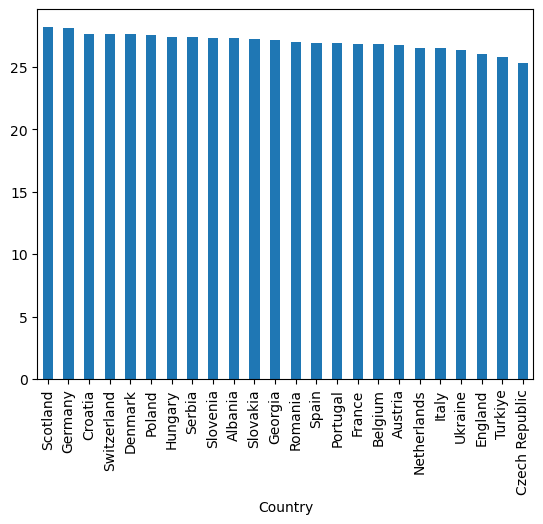

In [27]:
age_df=data.groupby(by="Country")["Age"].mean()
age_df=age_df.sort_values(ascending=False)
age_df.plot(kind="bar")

(-0.5, 799.5, 399.5, -0.5)

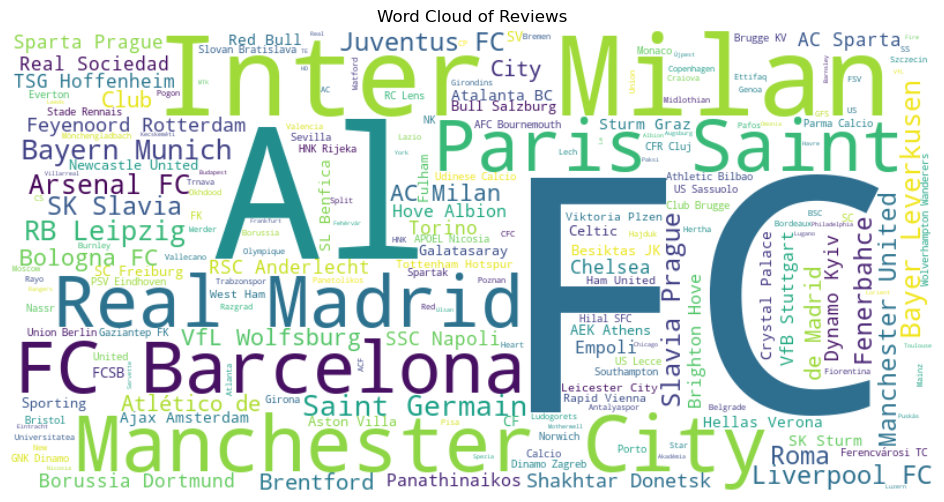

In [28]:
from wordcloud import WordCloud

reviews_text = ' '.join(data['Club'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')